<a href="https://colab.research.google.com/github/thekavyagada/thekavyagada/blob/main/Copy_of_ML_ws_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#linear regression
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics

In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/insurance.csv")

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#encoding string to integers
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
#creating a MinMaxScaler object for normalization and unnormalization
scaler = MinMaxScaler()

In [12]:
df_new = df.copy()

data = np.array(df['age'])
df_new['age'] =  scaler.fit_transform(np.float32(data).reshape(-1,1))

In [13]:
df_new['region'] = scaler.fit_transform(np.array(df_new['region']).reshape(-1,1))

In [14]:
df_new['charges'] = scaler.fit_transform(np.array(df_new['charges']).reshape(-1,1))

In [15]:
df_new['bmi'] = scaler.fit_transform(np.array(df_new['bmi']).reshape(-1,1))

In [16]:
#comparing the dataframe before and after normalization
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
df_new

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,1.000000,0.251611
1,0.000000,1,0.479150,1,0,0.666667,0.009636
2,0.217391,1,0.458434,3,0,0.666667,0.053115
3,0.326087,1,0.181464,0,0,0.333333,0.333010
4,0.304348,1,0.347592,0,0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,0.333333,0.151299
1334,0.000000,0,0.429379,0,0,0.000000,0.017305
1335,0.000000,0,0.562012,0,0,0.666667,0.008108
1336,0.065217,0,0.264730,0,0,1.000000,0.014144


In [18]:
X, y = df_new.values[:, : -1], df_new.values[:, -1] #(dependent, independent features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(896, 6) (442, 6) (896,) (442,)


In [20]:
lin_reg = LinearRegression()

In [23]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_test = lin_reg.predict(X_test)

In [ ]:
#unnormalizaing
y_pred_test = scaler.inverse_transform(np.array(y_pred_test).reshape(-1,1))
X_train = scaler.inverse_transform(np.array(X_train).reshape(-1,1))
y_train = scaler.inverse_transform(np.array(y_train).reshape(-1,1))

In [ ]:
X_test = scaler.inverse_transform(np.array(X_test).reshape(-1,1))
y_test = scaler.inverse_transform(np.array(y_test).reshape(-1,1))

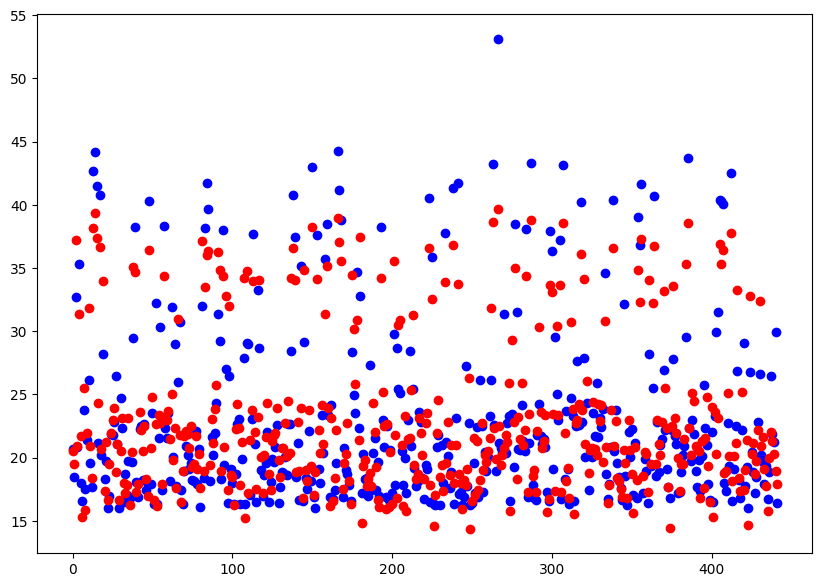

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(range(len(y_test)),y_test,color='blue')
plt.scatter(range(len(y_pred_test)),y_pred_test,color='red')
plt.show()

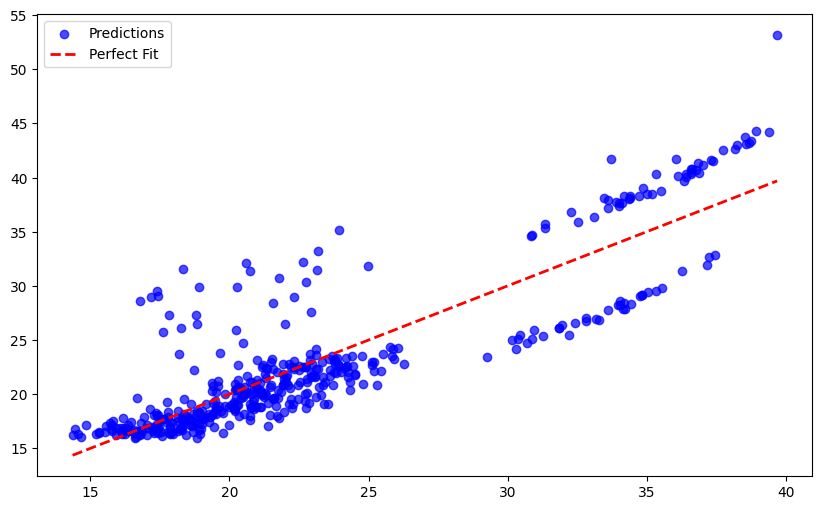

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_test, color='blue', marker='o', alpha=0.7, label='Predictions')
plt.plot([min(y_pred_test), max(y_pred_test)],
         [min(y_pred_test), max(y_pred_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

In [ ]:
print(f'R2 Score = {metrics.r2_score(y_test,y_pred_test)}')
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred_test)}')
print(f'RMSE ={np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))}')

R2 Score = 0.7602640815227402
MAE = 2.494520929129009
MSE = 12.367049824164601
RMSE =3.5166816495333495
